Tomasz Zębala 325339

In [1]:
import sympy as sp
from sympy.utilities import lambdify

In [2]:
sp.init_printing()

In [3]:
x = sp.Symbol('x', real=True)
k = sp.Symbol('k', real=True, positive=True)
a = sp.Symbol('a', real=True)
m = sp.Symbol('m', real=True, positive=True)
t = sp.Symbol('t', real=True, positive=True)
h = sp.Symbol('hbar', real=True, positive=True)
n = sp.Symbol('n', integer=True, nonzero=True)
pi = sp.Symbol('pi', real=True, positive=True)
psi = sp.Function('psi')

x, k, a, m, t, h, n, psi(x)

Rozwiązanie rownania Schrodingera niezależnego od czasu dla studni nieskonczonego potencjału

In [4]:
eq = sp.Eq(psi(x).diff(x, x), -k**2 * psi(x))
sol = sp.dsolve(eq, psi(x), ics={psi(0): 0})
sol = sol.subs(k, n * sp.pi / a)
sol = sol.subs(sp.Symbol('C1'), sp.sqrt(2 / a))

sol

Obliczanie odchylenia standardowego położenia:

In [5]:
Ex = sp.integrate(sol.rhs * x * sol.rhs, (x, 0, a)).simplify()
Ex

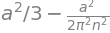

In [6]:
Ex2 = sp.integrate(sol.rhs * x**2 * sol.rhs, (x, 0, a)).simplify()
Ex2

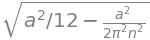

In [7]:
VarX = Ex2 - Ex**2
SigmaX = sp.sqrt(VarX)
SigmaX

Obliczanie odchylenia standardowego pędu:

In [8]:
p = (-1)*sp.I*h
Ep = sp.integrate(sol.rhs * p * sol.rhs.diff(x), (x, 0, a)).simplify()
Ep


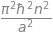

In [9]:
Ep2 = sp.integrate(sol.rhs * p**2 * sol.rhs.diff(x, x), (x, 0, a)).simplify()
Ep2

In [10]:
VarP = Ep2 - Ep**2
SigmaP = sp.sqrt(VarP)
SigmaP

Sprawdzam zasadę nieozanczoności Heisenberga:

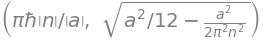

In [11]:
SigmaP, SigmaX

In [12]:
SigmaPf= lambdify((a, n), SigmaP.subs({pi: pi, h: h}))
SigmaPf(4, 2)

In [13]:
SigmaXf= lambdify((a, n), SigmaX.subs({pi: pi}))
SigmaXf(4, 2)

Test:

In [14]:
#parametry:
a, n = 90, 2

#Warunek
if SigmaPf(a, n)*SigmaXf(a, n) >= h/2:
    print("Działa")
else:
    print("Coś zepsułem")

Działa
